# Calibrazione degli Scintillatori

### Updated to 13 December 2024 - Andre

Viene eseguita (nuovamente) la calibrazione dei tre rivelatori, raccogliendo una statistica maggiore rispetto a quanto fatto precedentemente (in termini di threshold).

> * I conteggi vengono presi al minuto
> * Considerata l'area dei nostri rivelatori, ci attendiamo (teoria) 2400 muoni al minuto
> * Extra : conteggi di coincidenze doppie (al fine di valutare l'efficienza del rivelatore 2 al variare di tensione di alimentazione e soglia)
> * WDT del'onda quadra generata dal discriminatore a 169 per avere $\Delta t$ = 50 ns 
> * Tempo morto [dead time] = 122 ns


### Dettagli tecnici
* Discriminatore : constant fraction

In [38]:
#LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import uproot

#COSTANTI
FIGSIZE_1_1 = (10, 6)
FIGSIZE_3_1 = (10, 18)
FIGSIZE_3_2 = (18, 12)

FONT = "DejaVu Sans"
FONT_DIM = [12,15,18,21,27]
MARKER_SIZE = 4
LINE_WIDTH = 1.5
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.8


COLORI_BIN = ["tab:blue", "tab:red"]
COLORI_DUE = ["tab:blue", "tab:orange"]
COLORI_TRE = ["tab:blue", "tab:green", "tab:red"]
COLORI_ARC = ["tab:purple", "tab:blue", "tab:green", "tab:olive", "tab:orange", "tab:red"]
COLORI_ARC_10 = ["maroon", "tab:red","darkorange" ,"darkgoldenrod", "tab:olive", "tab:green", "teal", "tab:blue", "tab:purple", "darkmagenta"]


CARTELLA_IMMAGINI = "Immagini/"
ESPORTA_IMMGAGINI = True
FORMATO_IMMAGINI = ".pdf"
DPI = 300

#FONT (LaTeX)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Raccolta Dati

Ogni DataFrame contiene i conteggi (singoli) al minuto dei tre rivelatori (1 = rivelatore in alto, 2 = rivelatore al centro, 3 = rivelatore in basso) relativi ad un singolo voltaggio, cambiando la threshold.

In [39]:
# Rivelatore 1 = in alto, 2 = al centro, 3 = in basso 
data_800V = {
'V [V]':        np.full(11,800),
'Th [mV]':      [0,     1,      2, 3, 4, 5, 10, 25, 40, 50, 75,],     
'Counts/min_1': [3540,  1270,   580, 315, 203,94, 23, 4, 1, 3, 1],
'Counts/min_2': [53502, 21301,  8752, 4171, 2637, 2020, 1440 ,177, 30, 14, 4],
'Counts/min_3': [36024, 15821,  6956, 3836,2527 , 1955, 1483 ,235, 57 , 25, 6],
'N_doppie_12' : [1547,  801 ,   420, 238, 141 , 63, 17, 0, 0 , 0, 0], # Questo non ci serve
'N_doppie_13' : [1075,  642,    306, 165, 96 , 34, 6, 0 ,0 , 0, 0], # Questo ci serve
'N_doppie_23' : [3905,  1637,   1386, 1429, 1402,1347, 1127 , 80, 7, 2, 0], # Questo non ci serve 
'N_triple' :    [1047,  639 ,   300, 159, 90, 34, 5, 0, 0, 0, 0]
}

data_850V = {
'V [V]':        np.full(11, 850),  
'Th [mV]':      [0, 1, 2, 3, 5, 10, 25, 50, 75, 100, 125, ],     
'Counts/min_1': [6610, 3190, 1815, 1053,388, 73, 4, 0, 0, 0, 0, ],  
'Counts/min_2': [91289, 34951, 19019 , 10676, 4087, 1794, 779, 88,  23, 5, 3, ], 
'Counts/min_3': [54826, 27681, 16828, 10028,4251,1782, 956, 132, 27, 12, 2,],  
'N_doppie_12' : [2156, 1407, 1052,713,294,44,1, 0, 0, 0, 0,  ], # Questo non ci serve
'N_doppie_13' : [1362, 1074 , 785 ,568, 215,32, 0, 0, 0, 0, 0, ], # Questo ci serve
'N_doppie_23' : [7442, 2344, 1563,1459 , 1419,1318, 479, 38, 3, 1, 0, ], # Questo non ci serve 
'N_triple' :    [1208, 1054, 778, 551, 209,30, 0, 0, 0, 0, 0]
}

data_900V = {
'V [V]':        np.full(13, 900),  
'Th [mV]':      [0, 2, 5, 10, 15, 25, 30, 35, 50, 75, 100, 125, 150, ],     
'Counts/min_1': [9646, 3592, 1073, 256, 94, 21, 17,  5, 0, 0, 0, 0, 0,],  
'Counts/min_2': [163610, 30828,  10027, 2826, 1846,1469, 1263 ,952 ,394, 99, 43, 20, 9] , 
'Counts/min_3': [79582, 28506,10611, 2984, 1833,1549, 1428 ,1172 , 496, 130, 57, 26, 14],  
'N_doppie_12' : [2980, 1482,700, 177, 54, 13, 9 , 3 , 0 , 0, 0, 0, 0 ], # Questo non ci serve
'N_doppie_13' : [1710, 1183,536, 128, 37, 8, 1, 3, 0, 0, 0, 0, 0 ], # Questo ci serve
'N_doppie_23' : [13651, 2282, 1333, 1366, 1365 ,1179, 991, 673, 212, 16, 15, 4, 4 ], # Questo non ci serve 
'N_triple' :    [1427, 1155, 529, 126, 37, 8, 1, 3 , 0, 0, 0, 0, 0]
}

data_950V = {
'V [V]':        np.full(14, 950),  
'Th [mV]':      [0, 10, 15, 25, 35, 45, 50, 75, 100, 125, 150, 175, 200, 225 ],     
'Counts/min_1': [14537, 915, 362, 99, 25, 12,13, 2, 1, 1, 1, 1, 1, 0],  
'Counts/min_2': [216649, 6682, 3095, 1752, 1647, 1277, 1081, 418, 168, 69, 30, 19, 11, 4, ], 
'Counts/min_3': [112528, 7417, 3312,1771, 1651, 1387,1313, 548, 232, 79, 40, 21, 17, 4, ],  
'N_doppie_12' : [4600, 600, 267 ,67, 17, 7,7, 0, 0, 0, 1, 0, 1, 0,], # Questo non ci serve
'N_doppie_13' : [2051, 450, 177,42, 11, 6, 3, 0, 0, 0, 0, 0, 1, 0,], # Questo ci serve
'N_doppie_23' : [21521, 1393, 1340,1342, 1325, 966, 802, 222, 60, 14, 8, 0, 3, 2, ], # Questo non ci serve 
'N_triple' :    [1501, 441, 174,42, 10, 6 , 3, 0, 0, 0, 0, 0, 1, 0, ]
}

# I dati dello scintillatori 1 sono falsi perché è instabile - li segno solo per 
# compatibilità del dataframe
data_1000V = {
'V [V]':        np.full(16, 1000),  
'Th [mV]':      [0, 10, 25, 35, 40,  50, 60, 70, 75, 100, 125, 150,  175, 200, 225, 250, ],     
'Counts/min_1': [25795, 4659, 867, 384, 316, 161, 82, 50, 35, 16, 13, 4, 3, 0, 2, 0, ],  
'Counts/min_2': [316130, 14685, 2611, 1816, 1725,  1590, 1479, 1192, 1083, 568, 293, 152, 80, 53, 19, 10, ],   
'Counts/min_3': [153021, 16012, 2837, 1822, 1747, 1567, 1547, 1335,1234, 719, 370, 174, 100, 48, 44, 15,], 
'N_doppie_12' : [7225, 1422, 564, 259, 209, 98, 42, 26,18, 7, 4, 1, 1, 0, 0, 0], # Questo non ci serve 
'N_doppie_13' : [3226, 1125, 409, 172, 143, 70, 22, 12,11, 2, 3, 0, 2, 0, 0, 0], # Questo ci serve
'N_doppie_23' : [29180, 1524, 1356, 1293, 1319, 1257, 1199, 884,768, 343, 135, 48, 19, 7, 7, 8], # Questo non ci serve 
'N_triple' :    [2014, 1106, 406, 171, 139, 65, 22, 10, 9, 2, 2, 0, 1, 0, 0, 0]
}

data_1050V = {
'V [V]':        np.full(21 , 1050),  
'Th [mV]':      [0, 10, 25, 35, 40, 45,  50, 55, 60, 65, 75, 83, 90 ,100, 125, 150, 175, 200, 225, 250, 255, ],    
'Counts/min_1': [27995, 4848 , 1013, 426, 319, 240,  147, 137, 75, 76, 55, 37,  29 ,17, 13, 5, 2, 4, 2, 2, 1,],   
'Counts/min_2': [286355, 25740, 5798, 2983, 2365, 2185,  1897, 1722, 1697, 1672, 1652, 1577,  1438,1293, 826, 452, 274, 183, 103, 68,64, ],   
'Counts/min_3': [198399, 26699, 6532, 3260, 2641, 2277,  1870, 1728, 1689,1635,1639, 1649,  1510,1418, 955, 563, 363, 251, 153, 106, 82,],   
'N_doppie_12' : [7794, 1473, 636, 303, 214, 158,  103, 94, 38, 48, 36, 26, 17,9, 5, 2, 1, 1, 1, 2, 1, ], # Questo non ci serve 
'N_doppie_13' : [3828, 1185, 481, 202, 143, 104,  69, 50, 23, 29, 19, 14, 7, 4, 4, 0, 1, 1, 0, 2, 1,], # Questo ci serve
'N_doppie_23' : [35165, 2009, 1413, 1386, 1411, 1478,  1359, 1280, 1312,1280,  1301, 1243, 1127 , 979, 527, 238, 128, 90, 34, 18, 21, ], # Questo non ci serve   
'N_triple' :    [2403, 1150, 477, 199, 139, 102, 68, 50, 23, 28, 19, 14,7 ,4, 3, 0, 1, 0, 0, 2, 1]
}

data_1100V = {
'V [V]':        np.full(17, 1100),  
'Th [mV]':      [0, 10, 25, 35, 50, 65, 75,  85, 90, 100, 110, 125, 150, 175, 200, 225, 255 ],        
'Counts/min_1': [35821, 8548, 2223, 1139, 470, 234,144,  119, 82, 46, 41, 21, 18, 15, 7, 2, 4],   
'Counts/min_2': [313701, 39788, 12653,  6604, 3127, 2097, 1835,1746, 1698,  1591, 1447, 1429, 1101, 785, 555, 360, 218, ], 
'Counts/min_3': [250563, 40022, 13753, 7217, 3405, 2154, 1825,  1699, 1676,1607,  1502, 1443,  1292, 977, 727, 436, 287, ],   
'N_doppie_12' : [9995, 1812, 1081, 704, 332, 165, 94,75, 52, 22, 25, 11, 9, 4, 3, 1, 2], # Questo non ci serve
'N_doppie_13' : [4700, 1285, 837, 526, 226, 114, 51, 45, 30,  12, 10, 8, 5, 4, 0, 0, 1], # Questo ci serve
'N_doppie_23' : [39803, 3012, 1483, 1429, 1436, 1397, 1332, 1308, 1340, 1268, 1167, 1106, 828, 498, 326, 168, 90], # Questo non ci serve 
'N_triple' :    [2729, 1150, 830, 522, 225, 111, 49, 42, 30, 12, 10, 8, 4, 3, 0, 0, 1]
}

data_1150V = {
'V [V]':        np.full(18, 1150),  
'Th [mV]':      [0, 10, 15, 25, 35, 40, 50, 65, 75, 100, 110, 125, 135, 150, 175, 200, 225, 255],     
'Counts/min_1': [46209, 13441, 8450, 4220, 2353, 1868, 1205, 685, 419, 202, 146 , 120, 78, 56, 38, 19, 16, 15 ],  
'Counts/min_2': [348310, 60355, 40564, 22759, 13714, 10756,  6694, 3818, 2807,1928, 1744 ,1707, 1634, 1628, 1395, 1202, 957, 644, ], 
'Counts/min_3': [301181, 59911, 41016, 24302, 14865, 11703, 7276, 4057, 2954, 1937, 1739 ,1738, 1604 , 1615, 1473, 1340, 1065, 800 ], 
'N_doppie_12' : [12235, 2306, 1741, 1442, 1111, 960, 715, 461, 280, 147, 96 ,75, 42 , 41, 13, 8, 6, 3], # Questo non ci serve
'N_doppie_13' : [5677, 1521, 1282, 1149, 865, 727, 539, 348, 211, 96, 58 ,52, 25 , 25, 10, 5, 3, 3], # Questo ci serve
'N_doppie_23' : [43793, 5222, 3100, 1878, 1524, 1464, 1413, 1424, 1390, 1342, 1321 ,1339, 1282 , 1310, 1098, 891, 639, 388], # Questo non ci serve 
'N_triple' :    [3087, 1190, 1160, 1129, 862, 719, 534, 344, 208, 93, 58, 51, 24, 25, 9, 4, 3, 3]
}

data_1200V = {
'V [V]':        np.full(16, 1200),  
'Th [mV]':      [0, 10, 25, 35, 50, 60, 75, 100, 125, 150, 160, 175, 190, 200, 225, 255],     
'Counts/min_1': [69140, 19445, 7404, 4623, 2534, 1757, 1057, 546, 261, 168, 139, 102, 77, 71, 58, 26],  
'Counts/min_2': [397870, 83597, 35363, 23608 ,13790, 9545, 5813, 3088, 2146, 1880, 1808, 1705, 1784, 1673, 1581, 1370], 
'Counts/min_3': [344291, 87243, 37006, 25246 ,15025, 10302, 6473, 3271, 2088, 1819, 1785, 1700, 1775, 1690, 1625, 1470], 
'N_doppie_12' : [15795, 3294,  1721, 1439,1177, 886, 640, 364, 184, 111, 92, 67, 47, 45, 37, 12], # Questo non ci serve
'N_doppie_13' : [7166, 2056, 1208, 1127,938, 659, 488, 245, 123, 65, 50, 42, 28, 28, 13, 1], # Questo ci serve
'N_doppie_23' : [46960,8478, 2624, 1830 ,1603, 1360,  1414, 1401, 1373, 1402, 1398, 1355, 1331, 1334, 1240, 1034], # Questo non ci serve 
'N_triple' :    [3630, 1357, 1194, 1097, 928, 656, 485, 243, 121, 63, 50, 42, 28, 28, 12, 1]
}

data_1250V = {
'V [V]':        np.full(16, 1250),  
'Th [mV]':      [0, 25, 35, 50, 65, 75, 90, 100, 125, 150, 160, 175, 190, 200, 225, 255, ],     
'Counts/min_1': [88551, 11695, 7278, 4180, 2576, 1991, 1504, 1146, 635, 423, 387, 291, 244, 179, 135, 80, ],  
'Counts/min_2': [458731, 50612, 35361, 22652, 14868, 11654, 7694, 6111, 3636, 2611, 2311, 2051, 1953, 1817, 1765, 1656,  ], 
'Counts/min_3': [404302, 52547, 36940, 24025, 15937, 12661, 8451, 6662, 3870, 2624, 2371, 2014, 1889, 1801, 1778,  1642,], 
'N_doppie_12' : [20997, 2150, 1612, 1450, 1137, 1001, 838, 712, 396, 270, 246, 192, 150, 115, 86, 36,], # Questo non ci serve
'N_doppie_13' : [10520, 1547, 1238, 1143, 854, 761, 610, 536, 296, 186, 163, 122, 100, 77, 55, 23, ], # Questo ci serve
'N_doppie_23' : [75971, 4180, 2597, 1851, 1537, 1482, 1473, 1517, 1438, 1411, 1462, 1382, 1404, 1346, 1356, 1308, ], # Questo non ci serve 
'N_triple' :    [6207, 1324, 1137, 1121, 839, 750, 608, 534, 294, 183, 162, 120, 97, 75, 53, 22 ]
}

df_800V = pd.DataFrame(data_800V)
df_850V = pd.DataFrame(data_850V)
df_900V = pd.DataFrame(data_900V)
df_950V = pd.DataFrame(data_950V)
df_1000V = pd.DataFrame(data_1000V)
df_1050V = pd.DataFrame(data_1050V)
df_1100V = pd.DataFrame(data_1100V)
df_1150V = pd.DataFrame(data_1150V)
df_1200V = pd.DataFrame(data_1200V)
df_1250V = pd.DataFrame(data_1250V)

Asse_x = {
    800:  np.array([0,  7, 15, 30,   45,  60,  75]),
    850:  np.array([0, 10, 25, 50,   75, 100, 125]),
    900:  np.array([0, 25, 50, 75,  100, 125, 150]),
    950:  np.array([0, 25, 75, 125, 175, 225]),
    1000: np.array([0, 25, 75, 125, 175, 225, 250]),
    1050: np.array([0, 25, 75, 125, 175, 225, 255]),
    1100: np.array([0, 25, 75, 125, 175, 225, 255]),
    1150: np.array([0, 25, 75, 125, 175, 225, 255]),
    1200: np.array([0, 25, 75, 125, 175, 225, 255]),
    1250: np.array([0, 25, 75, 125, 175, 225, 255])
}

dataframes =    [df_800V,   df_850V,    df_900V,    df_950V,    df_1000V,   df_1050V,   df_1100V,   df_1150V,   df_1200V,   df_1250V]
voltages =      [800,       850,        900,        950,        1000,       1050,       1100,       1150,       1200,       1250]  

In [40]:
for df, voltage in zip(dataframes, voltages):
    df['Counts/min_1'] = np.where(df['Counts/min_1'] == 0, 1, df['Counts/min_1'])

    epsilon_1 = df['N_triple'] / df['N_doppie_23']
    epsilon_2 = df['N_triple'] / df['N_doppie_13']
    epsilon_3 = df['N_triple'] / df['N_doppie_12']
    df['epsilon_1'] = epsilon_1
    df['epsilon_2'] = epsilon_2
    df['epsilon_3'] = epsilon_3

df_800V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_1,epsilon_2,epsilon_3
0,800,0,3540,53502,36024,1547,1075,3905,1047,0.268118,0.973953,0.676794
1,800,1,1270,21301,15821,801,642,1637,639,0.390348,0.995327,0.797753
2,800,2,580,8752,6956,420,306,1386,300,0.216450,0.980392,0.714286
3,800,3,315,4171,3836,238,165,1429,159,0.111267,0.963636,0.668067
4,800,4,203,2637,2527,141,96,1402,90,0.064194,0.937500,0.638298
5,800,5,94,2020,1955,63,34,1347,34,0.025241,1.000000,0.539683
6,800,10,23,1440,1483,17,6,1127,5,0.004437,0.833333,0.294118
7,800,25,4,177,235,0,0,80,0,0.000000,NaN,NaN
8,800,40,1,30,57,0,0,7,0,0.000000,NaN,NaN
9,800,50,3,14,25,0,0,2,0,0.000000,NaN,NaN


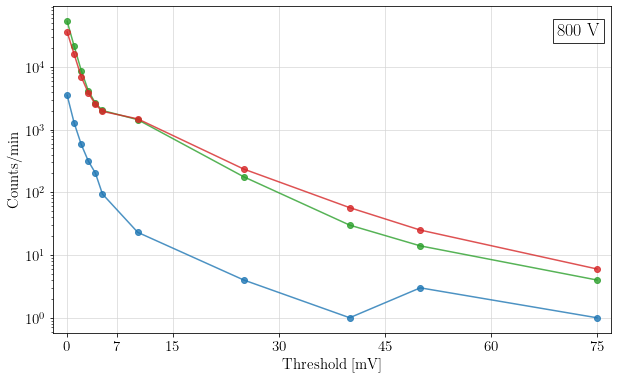

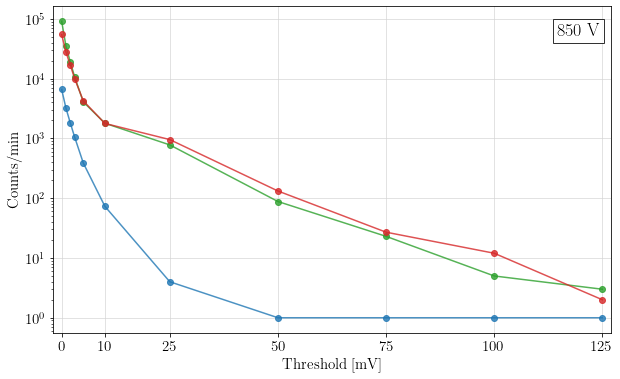

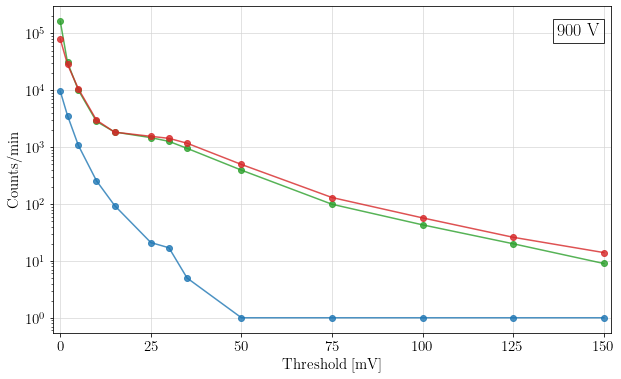

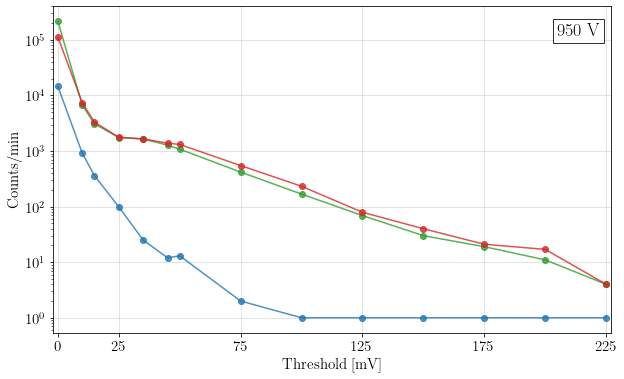

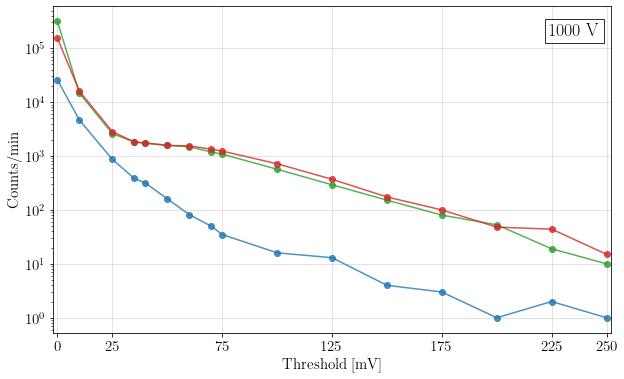

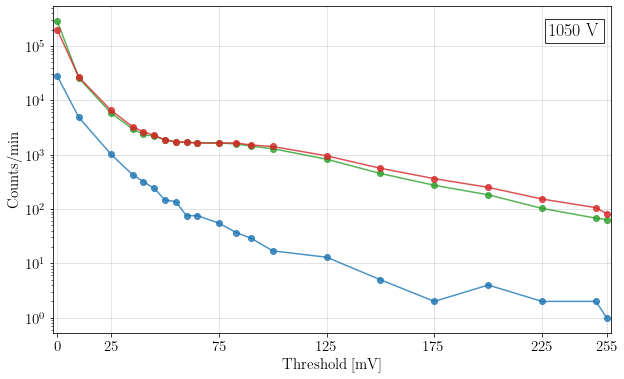

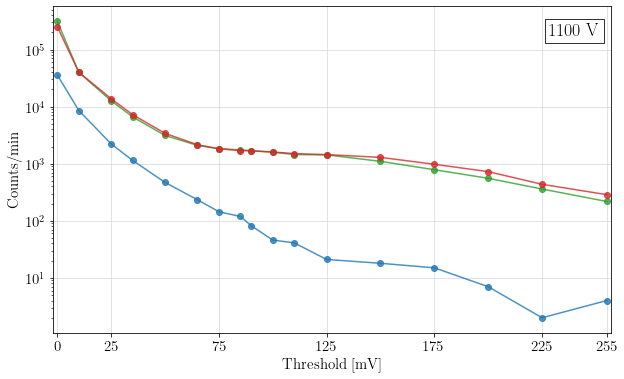

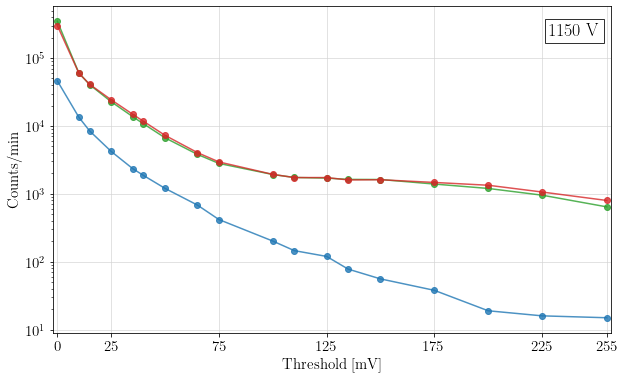

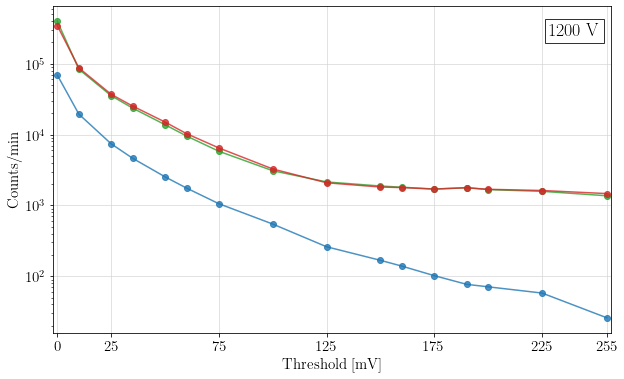

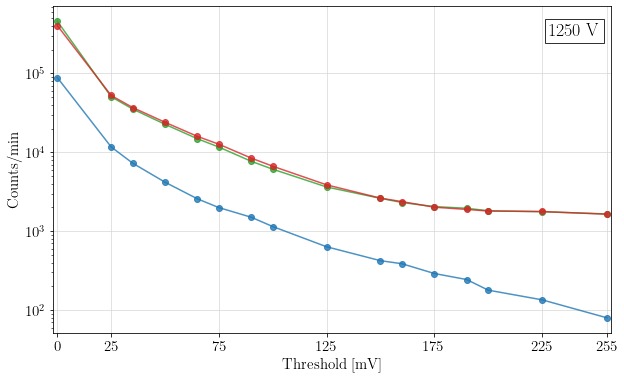

In [41]:
for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize = FIGSIZE_1_1)

    plt.plot(df['Th [mV]'], df['Counts/min_1'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[0], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['Counts/min_2'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[1], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['Counts/min_3'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[2], alpha = GRID_ALPHA)

    #plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['Th [mV]'].max() + 2)

    plt.yscale('log')
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "1_1_plateau_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()


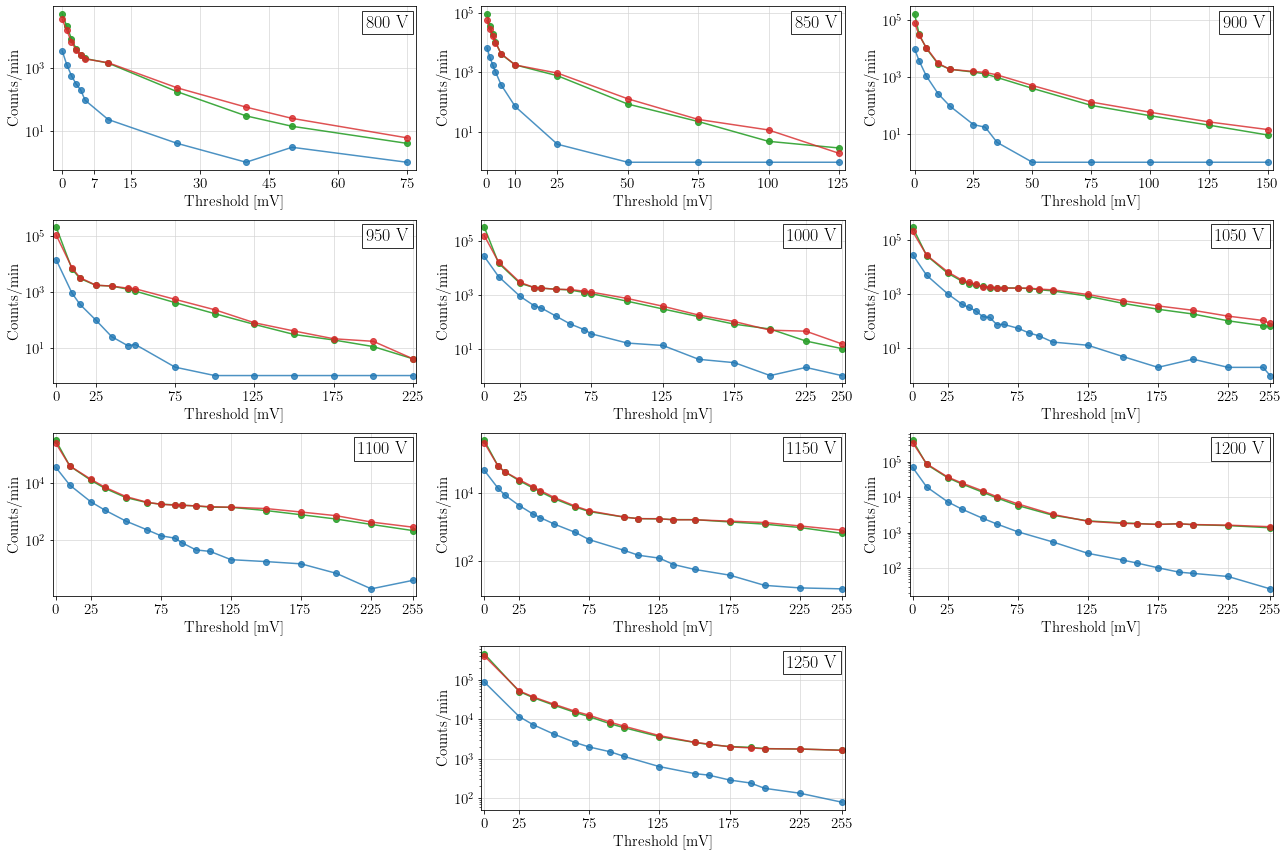

In [42]:
# Create subplots grid (4 rows x 3 columns)
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()

# Loop over dataframes and axes
for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    # Per l'ultimo grafico (10°), posizionalo al centro della quarta riga
    if iPlot == 9:
        ax = axes[3, 1]  # Quarta riga, colonna centrale
    else:
        ax = axes_flat[iPlot]

    # Plot dei dati
    ax.plot(df['Th [mV]'], df['Counts/min_1'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[0], alpha=GRID_ALPHA)
    ax.plot(df['Th [mV]'], df['Counts/min_2'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[1], alpha=GRID_ALPHA + 0.1)
    ax.plot(df['Th [mV]'], df['Counts/min_3'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[2], alpha=GRID_ALPHA)

    # Titolo e etichette degli assi
    #ax.set_title('Counts per Minute vs Threshold Voltage', fontsize=FONT_DIM[1])
    ax.set_xlabel('Threshold [mV]', fontsize=FONT_DIM[1])
    ax.set_ylabel('Counts/min', fontsize=FONT_DIM[1])

    # Configurazione dei tick
    ax.set_xticks(Asse_x[voltage])
    ax.tick_params(axis='x', labelsize=FONT_DIM[1])
    ax.tick_params(axis='y', labelsize=FONT_DIM[1])

    # Limiti degli assi
    ax.set_xlim(-2, df['Th [mV]'].max() + 2)

    # Scala logaritmica sull'asse Y
    ax.set_yscale('log')

    # Griglia
    ax.grid(True, color='lightgray', alpha=GRID_ALPHA)

    # Testo in alto a destra
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor='black'),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto


fig.delaxes(axes_flat[9])
fig.delaxes(axes_flat[11])

# Disposizione finale e visualizzazione
plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "1_2_plateau_per_tensione" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()


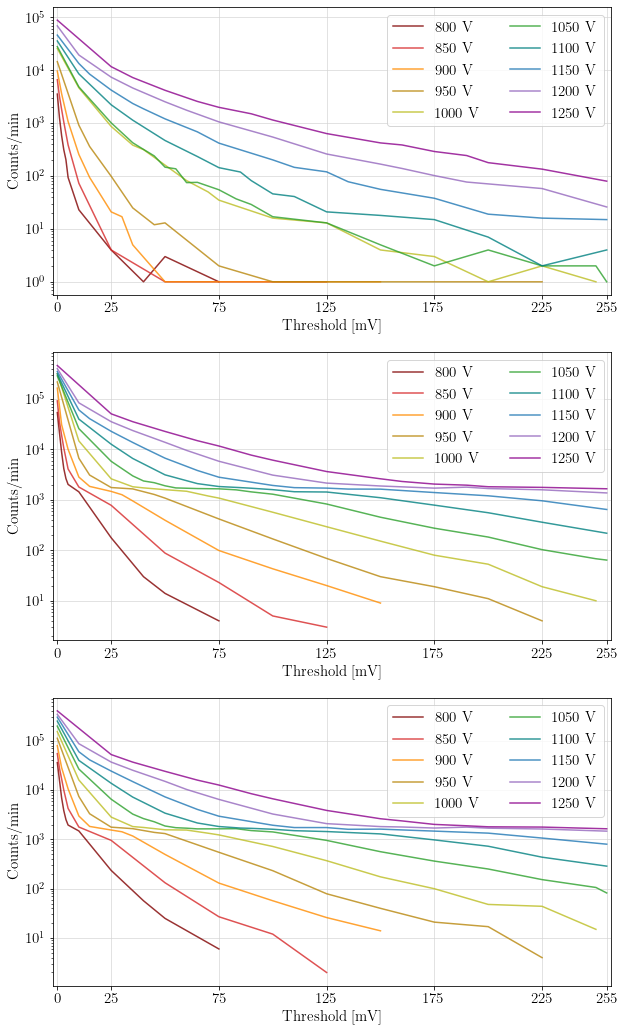

In [43]:
fig, axs = plt.subplots(3, 1, figsize=FIGSIZE_3_1)

for idx, (detactor, ax) in enumerate(zip([1, 2, 3], axs)):
    for i, (df, voltage) in enumerate(zip(dataframes, voltages)):
        # Traccia il grafico per il Counts/min corrispondente
        ax.plot(df['Th [mV]'], df[f'Counts/min_{detactor}'], linestyle='-', 
                linewidth=LINE_WIDTH, color=COLORI_ARC_10[i], alpha=GRID_ALPHA, label=f"{voltage} V")

    # Impostazioni comuni per tutti i grafici
    ax.set_xlabel('Threshold [mV]', fontsize=FONT_DIM[1])
    ax.set_ylabel('Counts/min', fontsize=FONT_DIM[1])

    # Impostazioni specifiche per il grafico corrente
    ax.set_xlim(-2, df['Th [mV]'].max() + 2)
    ax.set_yscale('log')
    ax.grid(True, color='lightgray', alpha=GRID_ALPHA)

    # Impostazioni per i tick
    ax.tick_params(axis='both', which='major', labelsize=FONT_DIM[1])

    # Se hai bisogno di un xticks personalizzato, usa ax.set_xticks() invece di plt.xticks()
    ax.set_xticks(Asse_x[voltage])  # Assicurati che 'Asse_x' sia definito correttamente

    # Legenda in due colonne in alto a destra
    ax.legend(loc='upper right', ncol=2, fontsize=FONT_DIM[1])

# Layout migliorato per evitare sovrapposizioni
# plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "1_2_plateau_per_rivelatore" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()
